In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load your Airbnb data
data = pd.read_csv("AB_NYC_2019.csv")

# Droping the columns with no useful information
data.drop(columns=['id','host_name','last_review'], inplace=True)

#Replacing all the missing values in 'name' with unkown
data['name'].fillna('Unknown', inplace=True)

# Replacing all NaN values in 'reviews_per_month' with 0
data.fillna({'reviews_per_month':0}, inplace=True)

# Removeing the duplicate rows
data.drop_duplicates(inplace=True)

# Removing outliars after 2 standard deviations
mean_price = data['price'].mean()
std_price = data['price'].std()

# Setting the threshold for outliers as 2 standard deviations from the mean
lower_threshold = mean_price - 2 * std_price
upper_threshold = mean_price + 2 * std_price

# Removing outliers based on the defined thresholds
data = data[(data['price'] >= lower_threshold) & (data['price'] <= upper_threshold)]

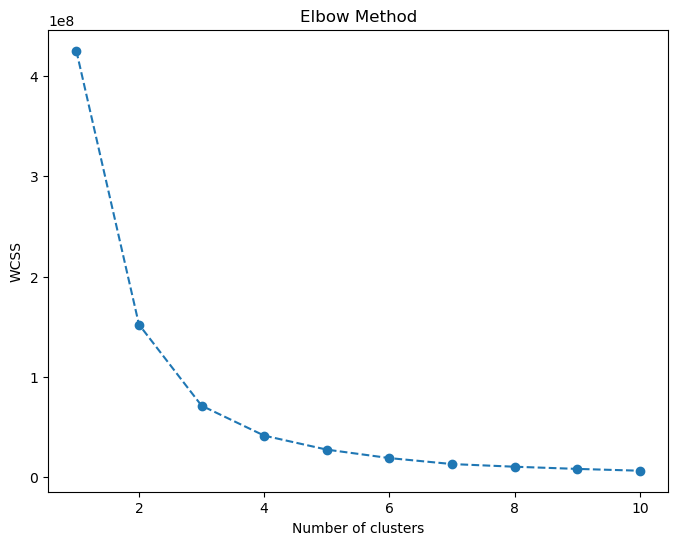

In [2]:
# Selecting the feature as price for clustering
selected_feature = data[['price']]

# We determine the optimal number of clusters using the Elbow method
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(selected_feature)
    wcss.append(kmeans.inertia_)

# Plot the Elbow method graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [3]:
# Performing the K-Means clustering with 3 clusters
k = 3
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters = kmeans.fit_predict(selected_feature)

# Adding the cluster labels to your original dataframe
data['price_cluster'] = clusters


In [4]:
# Visualize the clusters
for cluster in range(k):
    cluster_data = data[data['price_cluster'] == cluster]
    print(f"Cluster {cluster + 1}:")
    print(cluster_data['price'].describe())
    print()

Cluster 1:
count    14716.000000
mean       187.259785
std         38.920568
min        133.000000
25%        150.000000
50%        180.000000
75%        210.000000
max        282.000000
Name: price, dtype: float64

Cluster 2:
count    29762.000000
mean        77.815604
std         27.742897
min          0.000000
25%         55.000000
50%         75.000000
75%        100.000000
max        132.000000
Name: price, dtype: float64

Cluster 3:
count    3650.000000
mean      378.297534
std        84.695374
min       283.000000
25%       300.000000
50%       350.000000
75%       425.000000
max       625.000000
Name: price, dtype: float64



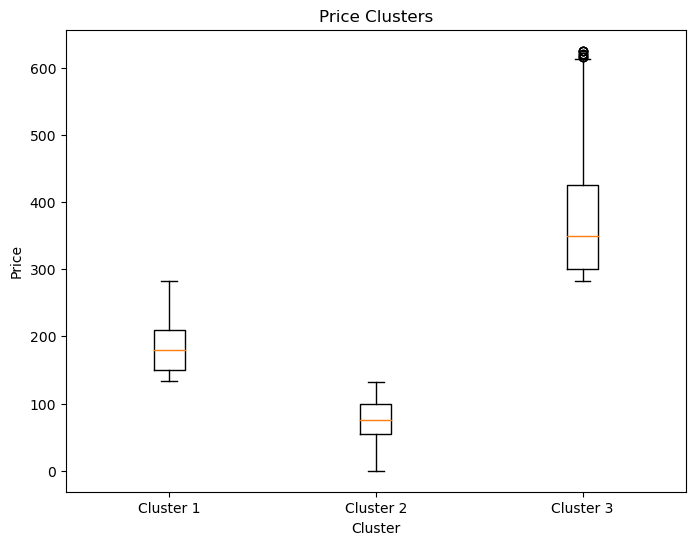

In [5]:
# Visualizing the clusters using a box plot
plt.figure(figsize=(8, 6))
for cluster in range(k):
    cluster_data = data[data['price_cluster'] == cluster]
    plt.boxplot(cluster_data['price'], positions=[cluster])
plt.xlabel('Cluster')
plt.ylabel('Price')
plt.title('Price Clusters')
plt.xticks(range(k), [f'Cluster {i + 1}' for i in range(k)])
plt.show()

IndexError: index 1 is out of bounds for axis 1 with size 1

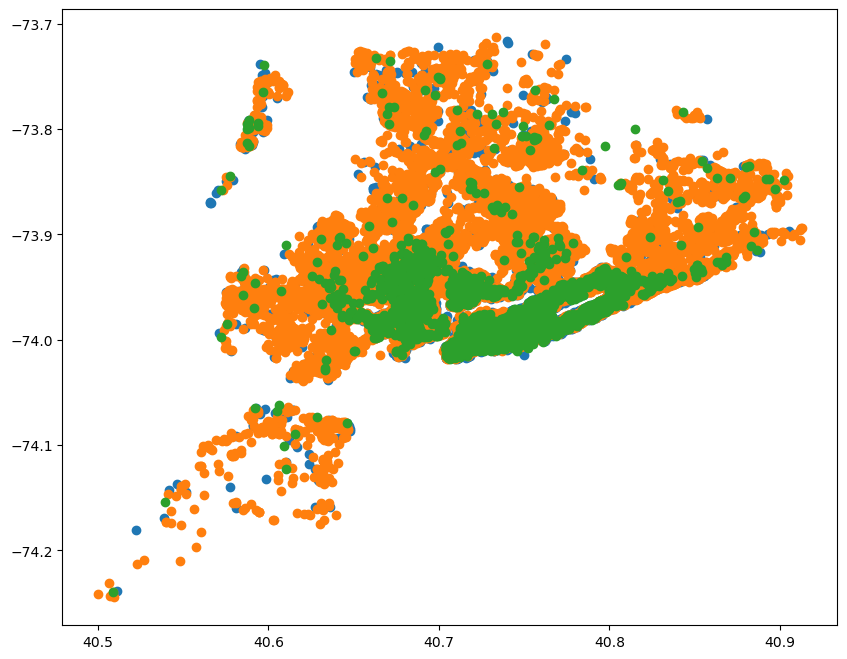

In [6]:
# Adding the cluster labels to your original dataframe
data['cluster'] = clusters

# Visualizing the clusters on a scatter plot
plt.figure(figsize=(10, 8))
for i in range(k):
    plt.scatter(data[data['cluster'] == i]['latitude'], data[data['cluster'] == i]['longitude'], label=f'Cluster {i}')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='k', label='Centroids')
plt.title('Clusters of Airbnb Listings')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.legend()
plt.show()

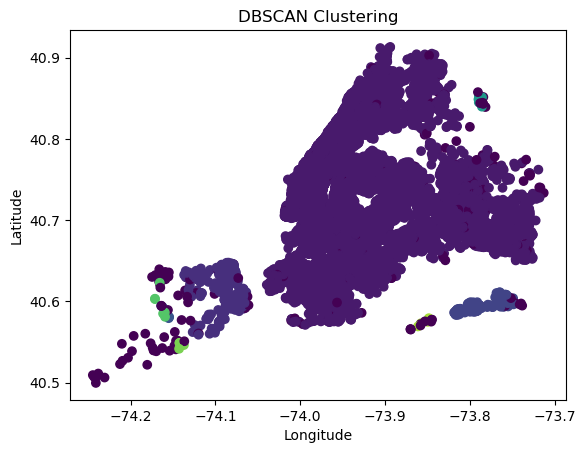

In [7]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Loading the Airbnb data into a DataFrame
data = pd.read_csv('AB_NYC_2019.csv')

# Selecting the features for clustering
features = data[['latitude', 'longitude', 'price', 'availability_365']]

# Standardizing the features 
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Performing DBSCAN clustering
eps = 0.5  # The maximum distance between two samples to be considered as neighbors
min_samples = 5  # The number of samples (or total weight) in a neighborhood for a point to be a core point
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
clusters = dbscan.fit_predict(scaled_features)

# Adding the cluster labels in the DataFrame
data['cluster'] = clusters

# Visualizing the clusters
plt.scatter(data['longitude'], data['latitude'], c=data['cluster'], cmap='viridis')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('DBSCAN Clustering')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Load your Airbnb data into a DataFrame
# Replace 'your_data.csv' with the actual path to your data file
data = pd.read_csv('AB_NYC_2019.csv')

# Select the features you want to use for clustering
features = data[['latitude', 'longitude', 'price', 'availability_365']]

# Standardize the features (important for hierarchical clustering)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Perform hierarchical clustering
linkage_matrix = linkage(scaled_features, method='ward')

# Create a dendrogram to visualize the clustering hierarchy
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, orientation='top', labels=np.array(data.index), distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Airbnb Listings')
plt.ylabel('Distance')
plt.show()

# Choose the number of clusters based on the dendrogram or another criterion
# You can cut the dendrogram at a certain height to determine the number of clusters

# Fit AgglomerativeClustering with the chosen number of clusters
n_clusters = 3  # Change this to your desired number of clusters
agglomerative_cluster = AgglomerativeClustering(n_clusters=n_clusters)
data['cluster'] = agglomerative_cluster.fit_predict(scaled_features)

# Visualize the clusters (only for latitude and longitude)
plt.scatter(data['longitude'], data['latitude'], c=data['cluster'], cmap='viridis')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Hierarchical Clustering')
plt.show()

# You can now analyze the clusters and their characteristics
